# 1174 Immediate food delivery 2  
Table: `Delivery`   


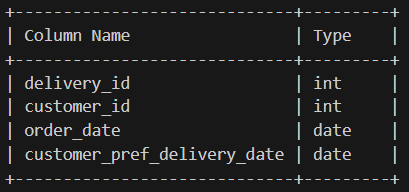  
delivery_id is the column of unique values of this table.  
The table holds information about food delivery to customers that make orders at some date and  
 specify a preferred delivery date (on the same order date or after it).  
 

If the customer's preferred delivery date is the same as the order date,   
then the order is called immediate; otherwise, it is called scheduled.  

The **first order** of a customer is the order with the earliest order date that the customer made.  
 It is guaranteed that a customer has precisely one first order.  
  
Write a solution to find the percentage of immediate orders   
in the first orders of all customers, **rounded to 2 decimal places.**  

The result format is in the following example.  
  
   
  
**Example 1:**  

**Input:**    
Delivery table:    
  
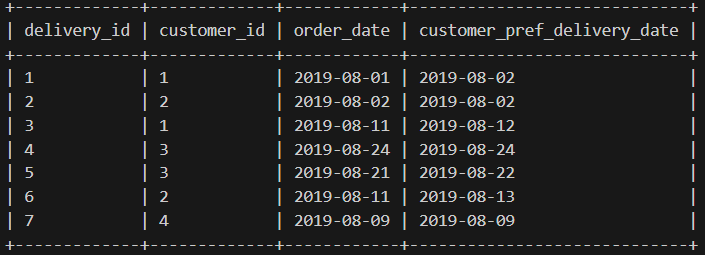    
**Output:**   
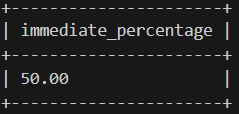  
**Explanation:**     
The customer id 1 has a first order with delivery id 1 and it is scheduled.  
The customer id 2 has a first order with delivery id 2 and it is immediate.  
The customer id 3 has a first order with delivery id 5 and it is scheduled.  
The customer id 4 has a first order with delivery id 7 and it is immediate.  
Hence, half the customers have immediate first orders.  

In [28]:
import pandas as pd

def immediate_food_delivery(delivery: pd.DataFrame) -> pd.DataFrame:
    delivery_first = delivery.groupby('customer_id').min().reset_index()
    length_of_immediate = len(delivery_first[delivery_first['order_date']==delivery_first['customer_pref_delivery_date']]['delivery_id'])
    length_of_first = len(delivery.groupby('customer_id').min().reset_index()['delivery_id'])
    return pd.DataFrame({'immediate_percentage': [round((length_of_immediate/length_of_first)*100,2)]})

In [29]:
immediate_food_delivery(delivery)

,immediate_percentage
0,50.0


In [30]:
delivery_id = [1,2,3,4,5,6,7]
customer_id = [1,2,1,3,3,2,4]
order_date = ['2019-08-01', '2019-08-02', '2019-08-11', '2019-08-24', '2019-08-21', '2019-08-11', '2019-08-09']
customer_pref_delivery_date = ['2019-08-02', '2019-08-02', '2019-08-12', '2019-08-24', '2019-08-22', '2019-08-13', '2019-08-09']
delivery = pd.DataFrame({'delivery_id': delivery_id,'customer_id': customer_id, 'order_date': order_date, 'customer_pref_delivery_date':customer_pref_delivery_date})
delivery['order_date'] = pd.to_datetime(delivery['order_date'], format="%Y-%m-%d")
delivery['customer_pref_delivery_date'] = pd.to_datetime(delivery['customer_pref_delivery_date'], format="%Y-%m-%d")
delivery

,delivery_id,customer_id,order_date,customer_pref_delivery_date
0,1,1,2019-08-01,2019-08-02
1,2,2,2019-08-02,2019-08-02
2,3,1,2019-08-11,2019-08-12
3,4,3,2019-08-24,2019-08-24
4,5,3,2019-08-21,2019-08-22
5,6,2,2019-08-11,2019-08-13
6,7,4,2019-08-09,2019-08-09


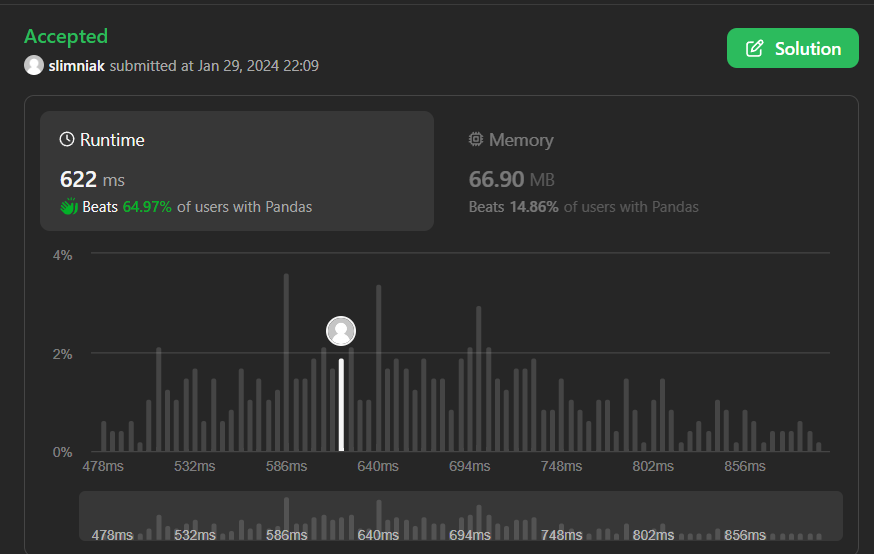  